Training Data Shape: (60000, 28, 28), Labels: (60000,)
Test Data Shape: (10000, 28, 28), Labels: (10000,)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8306 - loss: 0.6624 - val_accuracy: 0.9131 - val_loss: 0.3069
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9164 - loss: 0.3035 - val_accuracy: 0.9201 - val_loss: 0.2877
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9213 - loss: 0.2877 - val_accuracy: 0.9227 - val_loss: 0.2818
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9242 - loss: 0.2792 - val_accuracy: 0.9251 - val_loss: 0.2787
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9245 - loss: 0.2797 - val_accuracy: 0.9257 - val_loss: 0.2760
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9271 - loss: 0.2730 - val_accuracy: 0.9230 - val_loss: 0.2810
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9272 - loss: 0.2760 - val_accuracy: 0.9258 - val_loss: 0.2777
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9281 - loss: 0

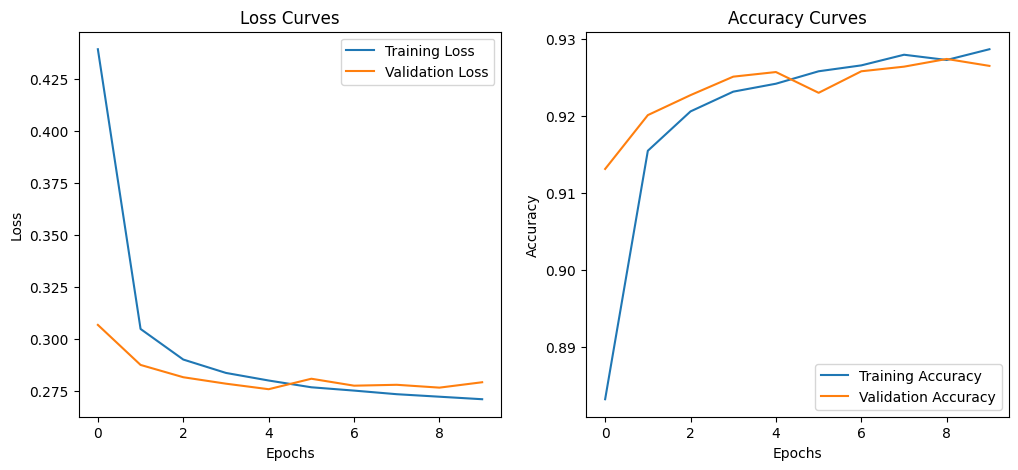

In [3]:
#TASK1
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For handling datasets (optional, but useful)
import matplotlib.pyplot as plt  # For plotting loss and accuracy graphs
from tensorflow import keras  # Main TensorFlow library for deep learning
from tensorflow.keras.models import Sequential  # To create a sequential neural network
from tensorflow.keras.layers import Dense  # Fully connected layer (Dense layer)
from tensorflow.keras.utils import to_categorical  # Converts labels into one-hot encoding

# Load the MNIST dataset (a dataset of handwritten digits 0-9)
from tensorflow.keras.datasets import mnist  

# Step 1: Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print the shape of training and testing data
print(f'Training Data Shape: {x_train.shape}, Labels: {y_train.shape}')  # Expected (60000, 28, 28) (60000,)
print(f'Test Data Shape: {x_test.shape}, Labels: {y_test.shape}')  # Expected (10000, 28, 28) (10000,)

# Step 2: Preprocess the data

# Flattening the 28x28 images into a 1D array of 784 pixels
# Normalizing by dividing by 255 to scale values between 0 and 1 (Improves training stability)
x_train = x_train.reshape(-1, 784).astype('float32') / 255.0
x_test = x_test.reshape(-1, 784).astype('float32') / 255.0

# Convert class labels (0-9) into one-hot encoded vectors
# Example: If the digit is "3", one-hot encoding will be [0,0,0,1,0,0,0,0,0,0]
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 3: Define a Simple Neural Network
model = Sequential([  # Sequential means layers will be stacked one after another
    Dense(10, activation='softmax', input_shape=(784,))  # Output layer with 10 neurons (digits 0-9)
])

# Print model architecture
model.summary()

# Step 4: Compile the model
model.compile(
    optimizer='rmsprop',  # RMSprop is an adaptive learning rate optimization algorithm
    loss='categorical_crossentropy',  # Since this is a multi-class classification problem, we use categorical crossentropy
    metrics=['accuracy']  # Accuracy is the metric used to evaluate performance
)

# Step 5: Train the model
history = model.fit(
    x_train, y_train,  # Training data (images and labels)
    epochs=10,  # Run for 10 epochs (one epoch = one full pass over training data)
    validation_data=(x_test, y_test),  # Test dataset used for validation
    batch_size=32  # Number of samples per gradient update (small batches improve efficiency)
)

# Step 6: Plot Training and Validation Loss/Accuracy
plt.figure(figsize=(12, 5))  # Set the figure size for better visibility

# Plot Loss Graph
plt.subplot(1, 2, 1)  # Create a subplot with 1 row, 2 columns, and select the first plot
plt.plot(history.history['loss'], label='Training Loss')  # Plot training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss
plt.title('Loss Curves')  # Set title
plt.xlabel('Epochs')  # Label x-axis
plt.ylabel('Loss')  # Label y-axis
plt.legend()  # Display legend

# Plot Accuracy Graph
plt.subplot(1, 2, 2)  # Select second plot
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plot training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy
plt.title('Accuracy Curves')  # Set title
plt.xlabel('Epochs')  # Label x-axis
plt.ylabel('Accuracy')  # Label y-axis
plt.legend()  # Display legend

plt.show()  # Show the plots


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5348 - loss: 1.6625 - val_accuracy: 0.8320 - val_loss: 0.7931
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8366 - loss: 0.7220 - val_accuracy: 0.8773 - val_loss: 0.5054
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8767 - loss: 0.4928 - val_accuracy: 0.8970 - val_loss: 0.4037
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8926 - loss: 0.4064 - val_accuracy: 0.9050 - val_loss: 0.3577
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8993 - loss: 0.3693 - val_accuracy: 0.9097 - val_loss: 0.3322
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9042 - loss: 0.3506 - val_accuracy: 0.9134 - val_loss: 0.3172
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9097 - loss: 0.3280 - val_accuracy: 0.9128 - val_loss: 0.3095
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9130 - loss: 0.3169 - val_accuracy: 0.9152 - v

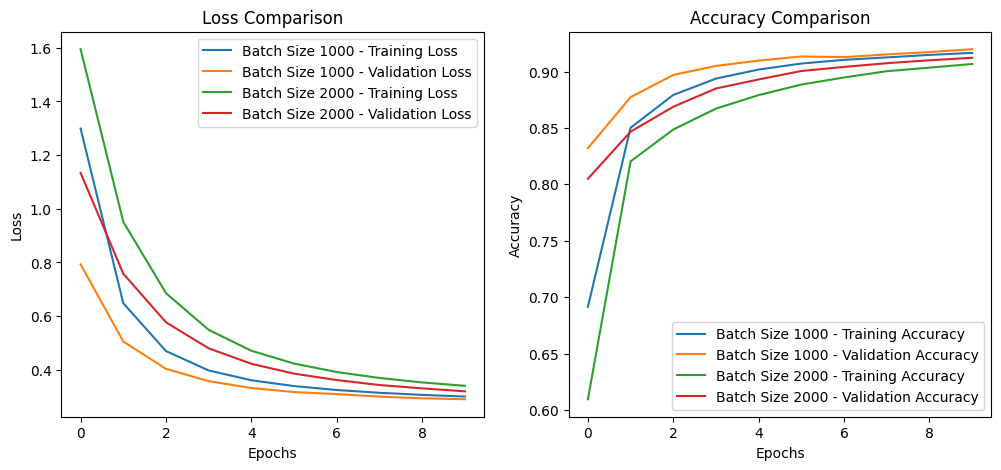

In [5]:
#TASK 2
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# Step 1: Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 2: Preprocess the data
x_train = x_train.reshape(-1, 784).astype('float32') / 255.0  # Flatten and normalize
x_test = x_test.reshape(-1, 784).astype('float32') / 255.0

y_train = to_categorical(y_train, 10)  # One-hot encode labels
y_test = to_categorical(y_test, 10)

# Function to create and train model with different batch sizes
def train_model(batch_size):
    # Define the model (Same as Task 1)
    model = Sequential([
        Dense(10, activation='softmax', input_shape=(784,))  # Single-layer model
    ])

    # Compile the model
    model.compile(
        optimizer='rmsprop',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train the model and store training history
    history = model.fit(
        x_train, y_train,
        epochs=10,
        batch_size=batch_size,  # Different batch sizes: 1000, 2000
        validation_data=(x_test, y_test),
        verbose=1
    )
    
    return history

# Train with batch size of 1000
history_1000 = train_model(1000)

# Train with batch size of 2000
history_2000 = train_model(2000)

# Step 4: Plot Loss and Accuracy Curves for both runs
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history_1000.history['loss'], label='Batch Size 1000 - Training Loss')
plt.plot(history_1000.history['val_loss'], label='Batch Size 1000 - Validation Loss')
plt.plot(history_2000.history['loss'], label='Batch Size 2000 - Training Loss')
plt.plot(history_2000.history['val_loss'], label='Batch Size 2000 - Validation Loss')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history_1000.history['accuracy'], label='Batch Size 1000 - Training Accuracy')
plt.plot(history_1000.history['val_accuracy'], label='Batch Size 1000 - Validation Accuracy')
plt.plot(history_2000.history['accuracy'], label='Batch Size 2000 - Training Accuracy')
plt.plot(history_2000.history['val_accuracy'], label='Batch Size 2000 - Validation Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.1454 - loss: 2.2934 - val_accuracy: 0.2683 - val_loss: 2.0939
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3062 - loss: 2.0333 - val_accuracy: 0.4471 - val_loss: 1.8504
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4791 - loss: 1.8046 - val_accuracy: 0.6060 - val_loss: 1.6360
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6217 - loss: 1.5976 - val_accuracy: 0.7035 - val_loss: 1.4532
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7119 - loss: 1.4229 - val_accuracy: 0.7533 - val_loss: 1.3003
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7477 - loss: 1.2859 - val_accuracy: 0.7812 - val_loss: 1.1742
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7712 - loss: 1.1711 - val_accuracy: 0.8009 - val_loss: 1.0703
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7915 - loss: 1.0684 - val_accuracy: 0.

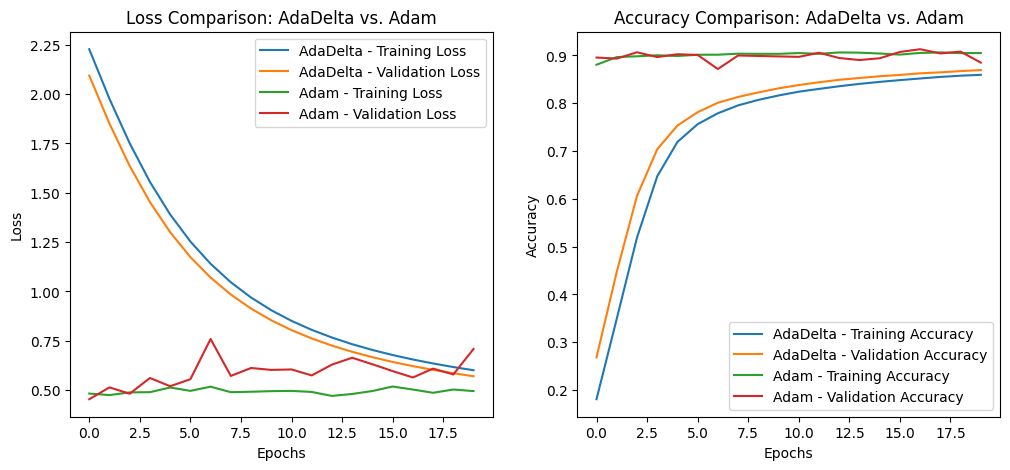

In [7]:
#TASK4
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adadelta, Adam

# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 2: Preprocess the data
x_train = x_train.reshape(-1, 784).astype('float32') / 255.0  # Flatten & normalize
x_test = x_test.reshape(-1, 784).astype('float32') / 255.0

y_train = to_categorical(y_train, 10)  # One-hot encode labels
y_test = to_categorical(y_test, 10)

# Function to create and train model with different optimizers
def train_model(optimizer, optimizer_name):
    # Define the model (Same as Task 1)
    model = Sequential([
        Dense(10, activation='softmax', input_shape=(784,))  # No hidden layers
    ])

    # Compile the model with the given optimizer
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train the model for 20 epochs
    history = model.fit(
        x_train, y_train,
        epochs=20,
        batch_size=128,  # Standard batch size
        validation_data=(x_test, y_test),
        verbose=1
    )
    
    return history

# Step 3: Train with AdaDelta (Learning Rate = 0.01)
history_adadelta = train_model(Adadelta(learning_rate=0.01), "AdaDelta")

# Step 4: Train with Adam (Learning Rate = 0.05)
history_adam = train_model(Adam(learning_rate=0.05), "Adam")

# Step 5: Plot Loss and Accuracy Curves for Comparison
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history_adadelta.history['loss'], label='AdaDelta - Training Loss')
plt.plot(history_adadelta.history['val_loss'], label='AdaDelta - Validation Loss')
plt.plot(history_adam.history['loss'], label='Adam - Training Loss')
plt.plot(history_adam.history['val_loss'], label='Adam - Validation Loss')
plt.title('Loss Comparison: AdaDelta vs. Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history_adadelta.history['accuracy'], label='AdaDelta - Training Accuracy')
plt.plot(history_adadelta.history['val_accuracy'], label='AdaDelta - Validation Accuracy')
plt.plot(history_adam.history['accuracy'], label='Adam - Training Accuracy')
plt.plot(history_adam.history['val_accuracy'], label='Adam - Validation Accuracy')
plt.title('Accuracy Comparison: AdaDelta vs. Adam')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.8329 - loss: 1.8649 - val_accuracy: 0.9284 - val_loss: 0.2865
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9295 - loss: 0.2754 - val_accuracy: 0.9303 - val_loss: 0.2920
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9337 - loss: 0.2683 - val_accuracy: 0.9365 - val_loss: 0.2812
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9381 - loss: 0.2584 - val_accuracy: 0.9250 - val_loss: 0.3198
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9377 - loss: 0.2605 - val_accuracy: 0.9285 - val_loss: 0.3231
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9409 - loss: 0.2456 - val_accuracy: 0.9315 - val_loss: 0.3413
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9384 - loss: 0.2669 - val_accuracy: 0.9348 - val_loss: 0.3404
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9402 - loss: 0.2576 - va

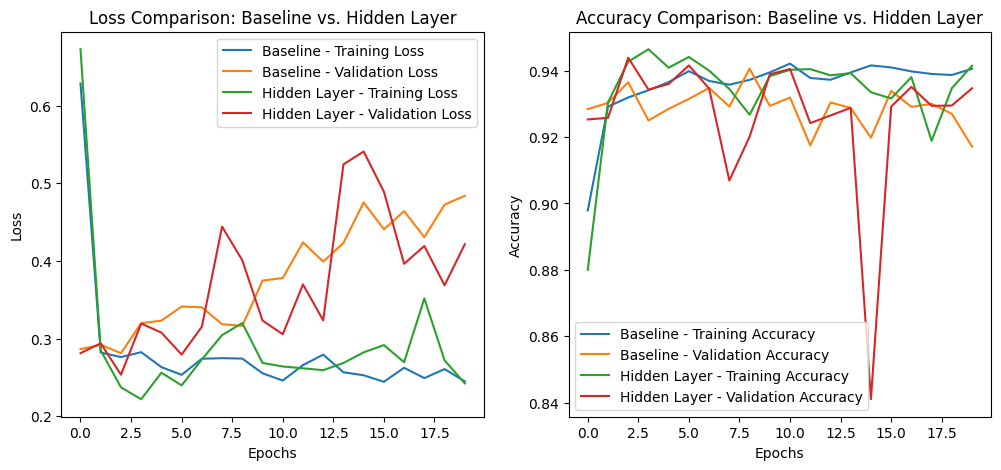

In [9]:
#TASK4
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam

# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 2: Preprocess the data
x_train = x_train.reshape(-1, 784).astype('float32') / 255.0  # Flatten & normalize
x_test = x_test.reshape(-1, 784).astype('float32') / 255.0

y_train = to_categorical(y_train, 10)  # One-hot encode labels
y_test = to_categorical(y_test, 10)

# Function to create and train the model
def train_model(hidden_layer=False):
    model = Sequential()
    
    # Input Layer (784 units)
    model.add(Dense(784, activation='relu', input_shape=(784,)))

    # Step 2: Add a hidden layer if required
    if hidden_layer:
        model.add(Dense(50, activation='relu'))  # Hidden Layer with 50 units
    
    # Output Layer (10 units, Softmax for classification)
    model.add(Dense(10, activation='softmax'))

    # Step 3: Compile the model
    model.compile(
        optimizer=Adam(learning_rate=0.05),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Step 4: Train for 20 epochs
    history = model.fit(
        x_train, y_train,
        epochs=20,
        batch_size=128,
        validation_data=(x_test, y_test),
        verbose=1
    )
    
    return history

# Train baseline model (Task 1)
history_baseline = train_model(hidden_layer=False)

# Train model with hidden layer (Task 4)
history_hidden = train_model(hidden_layer=True)

# Step 5: Plot Loss and Accuracy for Comparison
plt.figure(figsize=(12, 5))

# Loss Comparison
plt.subplot(1, 2, 1)
plt.plot(history_baseline.history['loss'], label='Baseline - Training Loss')
plt.plot(history_baseline.history['val_loss'], label='Baseline - Validation Loss')
plt.plot(history_hidden.history['loss'], label='Hidden Layer - Training Loss')
plt.plot(history_hidden.history['val_loss'], label='Hidden Layer - Validation Loss')
plt.title('Loss Comparison: Baseline vs. Hidden Layer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Comparison
plt.subplot(1, 2, 2)
plt.plot(history_baseline.history['accuracy'], label='Baseline - Training Accuracy')
plt.plot(history_baseline.history['val_accuracy'], label='Baseline - Validation Accuracy')
plt.plot(history_hidden.history['accuracy'], label='Hidden Layer - Training Accuracy')
plt.plot(history_hidden.history['val_accuracy'], label='Hidden Layer - Validation Accuracy')
plt.title('Accuracy Comparison: Baseline vs. Hidden Layer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



